In [1]:
import tensorflow_hub as hub
import tensorflow as tf
model = hub.load("https://tfhub.dev/captain-pool/esrgan-tf2/1")
# To add an extra dimension for batch, use tf.expand_dims()

from tensorflow.keras.preprocessing import image
import numpy as np

!rm original.png
!wget "https://user-images.githubusercontent.com/12981474/40157448-eff91f06-5953-11e8-9a37-f6b5693fa03f.png" -O original.png

filename = 'original.png'
img = image.load_img(filename)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

low_resolution_image = x # Low Resolution Image of shape [batch_size, height, width, 3]
low_resolution_image = tf.cast(low_resolution_image, tf.float32)
super_resolution = model(low_resolution_image) # Perform Super Resolution here
super_img = tf.cast(tf.clip_by_value(super_resolution[0], 0, 255), tf.uint8)

rm: cannot remove 'original.png': No such file or directory
--2022-10-25 06:36:11--  https://user-images.githubusercontent.com/12981474/40157448-eff91f06-5953-11e8-9a37-f6b5693fa03f.png
Resolving user-images.githubusercontent.com (user-images.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to user-images.githubusercontent.com (user-images.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34146 (33K) [image/png]
Saving to: ‘original.png’

original.png        100%[===================>]  33.35K  --.-KB/s    in 0s      

2022-10-25 06:36:11 (79.8 MB/s) - ‘original.png’ saved [34146/34146]



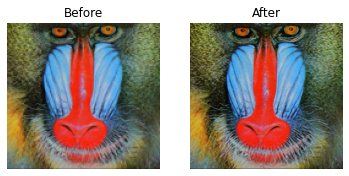

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(img)
ax1.set_title('Before')
ax1.axis("off")
 
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(super_img)
ax2.set_title('After')
ax2.axis("off")
 
plt.show()